# 第2章 データの扱いと可視化

## データの種類
- 量的データ
    - 数値で表されるデータ。比率や大小関係に意味がある**比率データ**や、大小関係に加えて加減に意味がある**間隔データ**に分類される。
- 質的データ
    - 分類や区分に意味がある(差や比に意味がない)**カテゴリーデータ**や、順序に意味がある**順位データ**に分類される。

## データの格納
主に`numpy.ndarray`と`pandas.DataFrame`を用いる。
### numpy.ndarray
N次元配列を作成するクラス。

In [21]:
import numpy as np
x = np.array([[1,2,3],[4,5,6]], dtype=np.float64)
print(type(x), x.shape, x.dtype)

<class 'numpy.ndarray'> (2, 3) float64


テキストファイルの読み込みは以下のように行う。
```
x = np.loadtxt('filename.txt', delimiter=',', skiprows=1, comments='#')
```
左からファイル名、データの区切り、読み飛ばす行、コメント行となる

### pandas.DataFrame
データベースライクなデータや時系列データなどを格納する際に使用される。2次元データを格納するクラス。
numpy.ndarrayとの違いとして、以下のようなことが挙げられる。
```
・2次元配列である
・データ要素の型が異なっても良い
・配列は可変長
```
また、インデックスやラベルを与え、これを参照しながらデータの操作が行える。
`pandas.Series`は1次元のデータの格納という点だけが異なる。

In [11]:
import pandas as pd
import os

# カレントディレクトリの移動
# os.chdir('/Users/Rkouhei/Desktop/Data_analysis/Tutorial/Ohmsha_DataScience/ch02')

df = pd.read_csv('data_pandas_01.csv')
df

,id,Class,Sex,Age,Height
0,A001,3,male,22,182
1,A002,1,female,38,158
2,A003,2,female,26,155
3,A004,1,female,35,162
4,A005,3,male,35,178


In [13]:
df2 = pd.read_csv('data_pandas_01.csv', index_col='id')
df2

,Class,Sex,Age,Height
id,,,,
A001,3,male,22,182
A002,1,female,38,158
A003,2,female,26,155
A004,1,female,35,162
A005,3,male,35,178


### 行、列の指定
loc, iloc : 複数要素を選択、取得・変更
at, iat : 単独要素の指定

In [16]:
df2.iloc[0:2]

,Class,Sex,Age,Height
id,,,,
A001,3,male,22,182
A002,1,female,38,158


In [17]:
df2.loc['A001':'A002']

,Class,Sex,Age,Height
id,,,,
A001,3,male,22,182
A002,1,female,38,158


In [18]:
df2.loc[['A001','A003']]

,Class,Sex,Age,Height
id,,,,
A001,3,male,22,182
A003,2,female,26,155


In [19]:
df2.loc[:,'Age']

id
A001    22
A002    38
A003    26
A004    35
A005    35
Name: Age, dtype: int64

### 時間系列
indexに時間系列を与えることで、時系列データ扱える。

In [20]:
nobs = 8
ts = pd.date_range('1/1/2000', periods=nobs, freq='M')
ts

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31'],
              dtype='datetime64[ns]', freq='M')

In [25]:
y0 = np.random.normal(loc=1.5, scale=2.0, size=nobs)
y = pd.Series(y0, index=ts)
y.head()

2000-01-31    2.720315
2000-02-29    1.436686
2000-03-31    3.286908
2000-04-30    2.188046
2000-05-31    3.000939
Freq: M, dtype: float64

### numpy.ndarrayとpandas.DataFrameの変換
numpy.ndarray &rarr; pandas.DataFrame

In [26]:
val = df['Height'].values
print(type(val))

<class 'numpy.ndarray'>


## グラフの作成
パッケージには以下のようなものがある
- matplotlib
- pandas
- seaborn
- mlxtend

### matplotlibを用いて複数のグラフを描く
一つのグラフに複数のプロットをする場合は以下のようになる

Text(0.5, 1.0, 'Example')

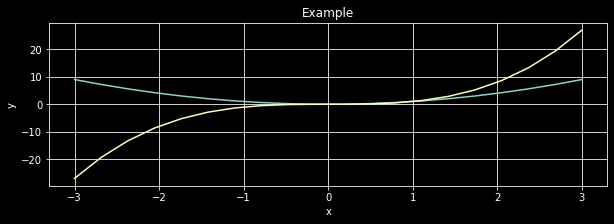

In [28]:
import matplotlib.pylab as plt

x = np.linspace(-3, 3, 20) # -3から3まで20の等間隔でリストを作成
y1 = x
y2 = x**2
y3 = x**3
y4 = x**4

fig = plt.subplots(figsize=(10,3)) # size [inch, inch]
plt.plot(x, y2)
plt.plot(x, y3)

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example')

一つのグラフに4つの座標軸を描く場合は2つあり、以下のように行う。

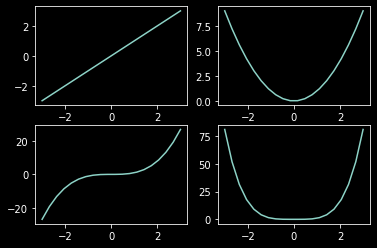

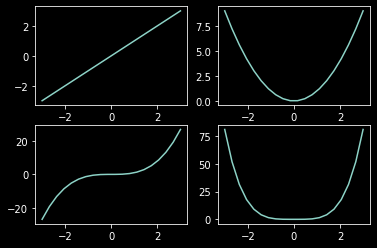

In [30]:
# method1
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6,4))
axs[0, 0].plot(x,y1) # 左上
axs[0, 1].plot(x,y2) # 右上
axs[1, 0].plot(x,y3) # 左下
axs[1, 1].plot(x,y4) # 右下

# method2
fig , ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(6,4)) 
ax1.plot(x,y1) # 左上
ax2.plot(x,y2) # 右上
ax3.plot(x,y3) # 左下
ax4.plot(x,y4) # 右下

### xlabelの欠落を防ぐ
savefigを行ったとき、画像からxlabelが欠落することがある。  
防ぐには以下のように行う。

In [32]:
# method1
plt.tight_layout()
plt.savefig('filename.png')

# method2
plt.savefig('filename.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

### Titanicのpandasプロット

In [35]:
titanic_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
df = pd.read_csv(titanic_url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


このデータについて
- データ数は891
- Ageはいくつか欠落している

欠損値を補完するために、あまり意味はないが中央値を採用する  
以下のヒストグラムが結果で、中央値で補完した20代が突出している

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

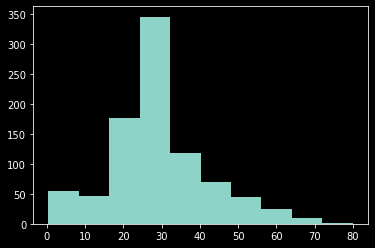

In [40]:
df['Age'].fillna(df.Age.median(), inplace=True)
plt.hist(df['Age'])

円グラフをプロットする場合は以下のようになる  
なお分類は
- 子供を15歳未満
- 青年を15歳以上60歳未満
- 高齢者を60歳以上

としている

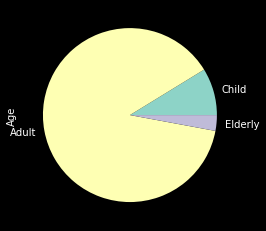

In [44]:
age1 = (df['Age'] < 15).sum()
age2 = ((df['Age'] >= 15) & (df['Age'] < 60)).sum()
age3 = (df['Age'] >= 60).sum()

series = pd.Series([age1, age2, age3], index=['Child', 'Adult', 'Elderly'], name='Age')
series.plot.pie(figsize=(4,4))

次に男女別にクロス集計を求めて、その棒グラフをプロットする

In [45]:
cross_01 = df.pivot_table(index=['Survived'], columns=['Sex'], values=['PassengerId'], aggfunc='count', fill_value=0)
cross_01

PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109

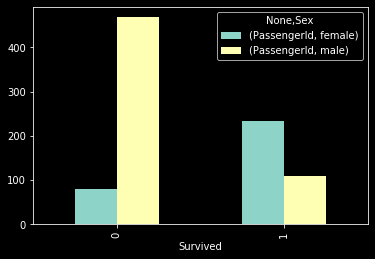

In [46]:
cross_01.plot(kind='bar')

### Irisのseabornプロット
種類は3種類あり、それぞれsetosa, versicolor, virginicaである  
それぞれのSepal(がく片)とPetal(花弁)に関して長さと幅の通知データがあり、種類によってSepalとPetalの特徴があるか見出す  
以下の画像はsetosaである

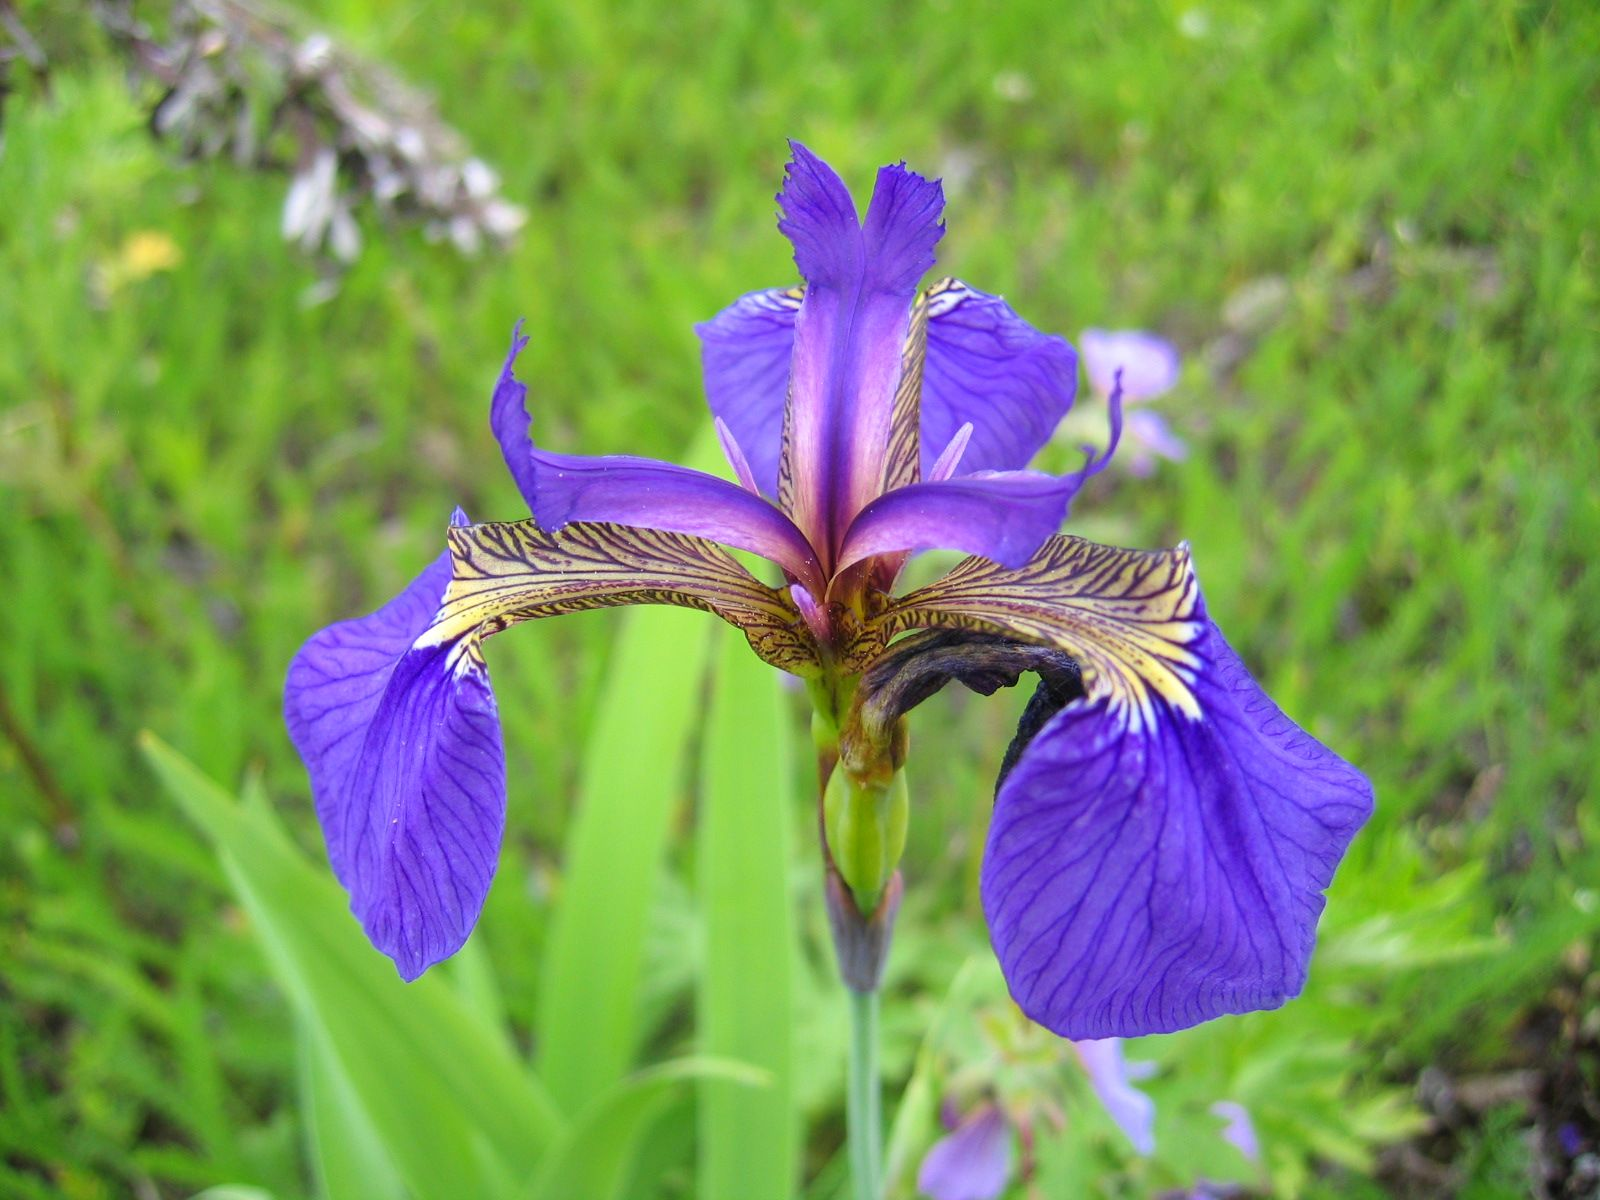

In [47]:
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/a/a7/Irissetosa1.jpg'
Image(url, width=300, height=300)

In [50]:
import seaborn as sns

sns.set()
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


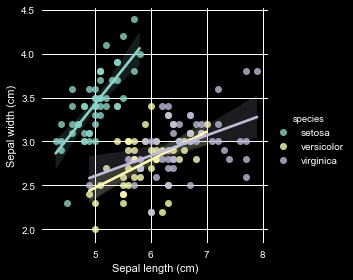

In [49]:
g = sns.lmplot(x='sepal_length', y='sepal_width', hue='species', truncate=True, size=4, data=iris)
g.set_axis_labels('Sepal length (cm)', 'Sepal width (cm)')

多変数のデータ分析を行う際に、各変数の組み合わせによる散布図を見ることが有用な場合がある  
これを一括してプロットするのが、**pairplot()**である

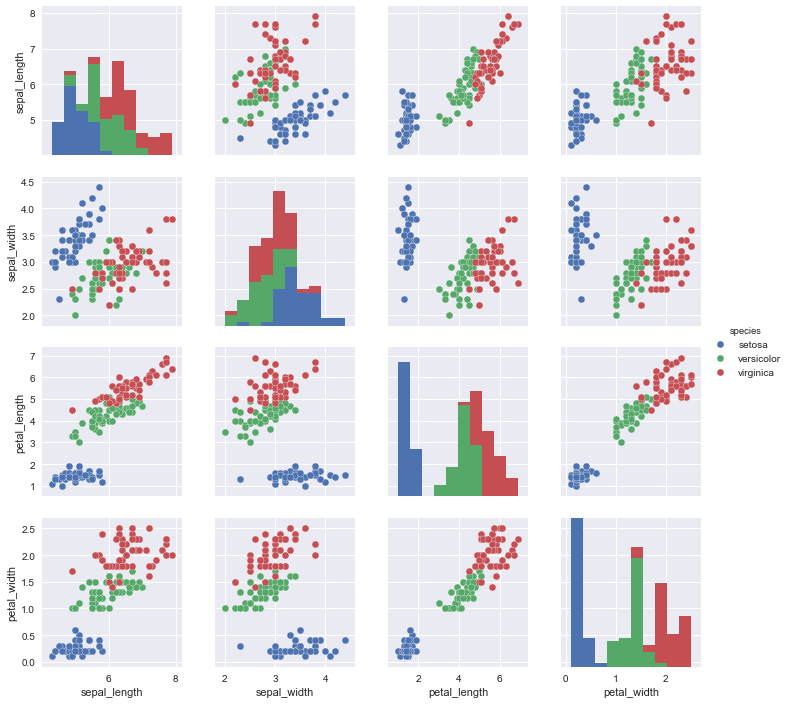

In [51]:
sns_plot = sns.pairplot(iris, hue='species')